Head of the DataFrame:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

Number of monthly observations: 4

Resampled to Monthly Average Temperature:
            Monthly_Avg_Temp
date                        
2017-01-01         15.710873
2017-02-01         18.349981
2017-03-01         23.753760
2017-04-01         30.753663

DataFrame with date as index (Monthly Average):
            Monthly_Avg_Temp
date                        
2017-01-01         15.710873
2017-02-01         18.349981
2017-03-01         23.753760
2017-04-01         30.753663

--- Summary Statistics ---
count     4.000000
mean     22.142069
std       6.645733
min      15.710873
25%      17.690204
50%    

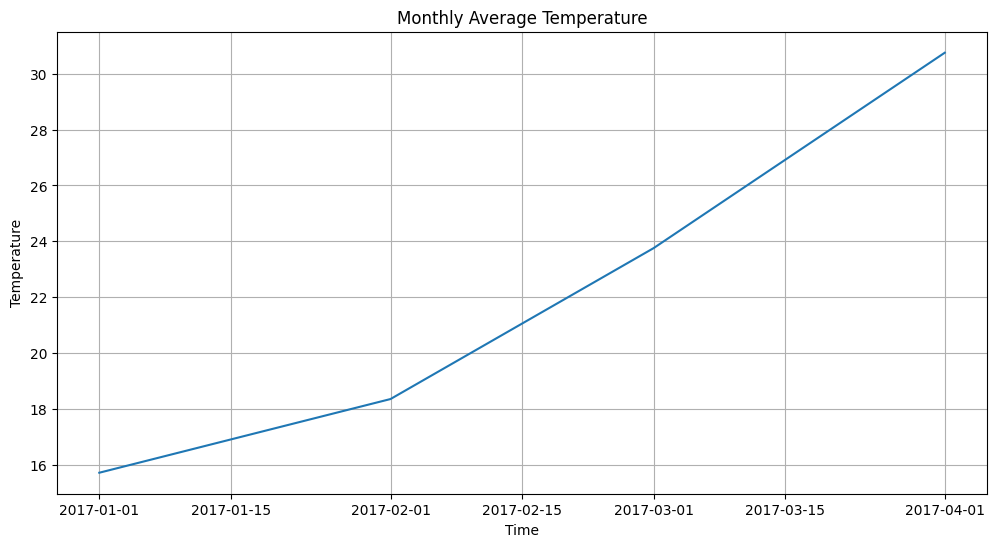


Insufficient data for seasonal decomposition. Requires at least 24 observations, but only 4 found.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/DailyDelhiClimateTest.csv'  # Replace with the actual path to your downloaded CSV file
date_column = 'date'
value_column = 'meantemp'
date_format = '%Y-%m-%d'
frequency = 12  # For yearly seasonality after resampling to monthly
decomposition_model = 'additive'

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)

    # Resample to monthly average
    df_monthly = df[value_column].resample('MS').mean()
    df = pd.DataFrame(df_monthly)
    df.rename(columns={value_column: 'Monthly_Avg_Temp'}, inplace=True)
    value_column = 'Monthly_Avg_Temp'  # Update value column name
    print(f"\nNumber of monthly observations: {len(df)}")
    print("\nResampled to Monthly Average Temperature:")
    print(df.head())

    print("\nDataFrame with date as index (Monthly Average):")
    print(df.head())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Calculate summary statistics ---
print("\n--- Summary Statistics ---")
print(df[value_column].describe())

# --- Plot the data ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[value_column])
plt.title("Monthly Average Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

# --- Decompose the time series ---
if len(df) >= 2 * frequency:  # Ensure at least two full cycles for decomposition
    try:
        decomposition = seasonal_decompose(df[value_column], model=decomposition_model, period=frequency)
        print("\n--- Decomposition Results (first few values) ---")
        print("Trend:")
        print(decomposition.trend.head())
        print("\nSeasonal:")
        print(decomposition.seasonal.head())
        print("\nResidual:")
        print(decomposition.resid.head())

        decomposition.plot()
        plt.suptitle(f"{decomposition_model.capitalize()} Decomposition of Monthly Average Temperature", y=1.02)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during decomposition: {e}")
else:
    print(f"\nInsufficient data for seasonal decomposition. Requires at least {2 * frequency} observations, but only {len(df)} found.")